# Pizza Price Prediction

In [276]:
import pandas as pd

In [277]:
data = pd.read_csv('./pizza_v2.csv')

#### 1. Display top 5 rows

In [278]:
data.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


#### 2. display last 5 rows

In [279]:
data.tail()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
124,E,"Rp39,000",8.5 inch,tuna,spicy tuna,small,yes,yes,yes
125,E,"Rp72,000",12 inch,tuna,spicy tuna,medium,yes,yes,yes
126,E,"Rp99,000",14 inch,tuna,spicy tuna,large,yes,yes,yes
127,E,"Rp44,000",8.5 inch,meat,BBQ_meat_fiesta,small,yes,no,yes
128,E,"Rp78,000",12 inch,meat,BBQ_meat_fiesta,medium,no,no,yes


#### 3. find shape of dataset

In [280]:
data.shape

(129, 9)

#### 4. get information about dataset

In [281]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          129 non-null    object
 1   price_rupiah     129 non-null    object
 2   diameter         129 non-null    object
 3   topping          129 non-null    object
 4   variant          129 non-null    object
 5   size             129 non-null    object
 6   extra_sauce      129 non-null    object
 7   extra_cheese     129 non-null    object
 8   extra_mushrooms  129 non-null    object
dtypes: object(9)
memory usage: 9.2+ KB


#### 5. check null values

In [282]:
data.isna().sum()

company            0
price_rupiah       0
diameter           0
topping            0
variant            0
size               0
extra_sauce        0
extra_cheese       0
extra_mushrooms    0
dtype: int64

#### 6. get overall statistics

In [283]:
data.describe()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
count,129,129,129,129,129,129,129,129,129
unique,5,43,12,12,20,6,2,2,2
top,C,"Rp72,000",12 inch,chicken,classic,medium,yes,yes,yes
freq,30,11,49,29,30,41,76,86,72


#### 7. data preprocessing

In [284]:
data.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [285]:
data.rename({'price_rupiah':'price'}, axis=1, inplace=True)

In [286]:
data.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [287]:
data['price'] = data['price'].str.replace('Rp', '')
data['price'] = data['price'].str.replace(',', '').astype('int32')

In [288]:
data.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,235000,22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,198000,20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,120000,16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,155000,14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,248000,18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [289]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          129 non-null    object
 1   price            129 non-null    int32 
 2   diameter         129 non-null    object
 3   topping          129 non-null    object
 4   variant          129 non-null    object
 5   size             129 non-null    object
 6   extra_sauce      129 non-null    object
 7   extra_cheese     129 non-null    object
 8   extra_mushrooms  129 non-null    object
dtypes: int32(1), object(8)
memory usage: 8.7+ KB


In [290]:
def convert(value):
    return value * 0.0054

In [291]:
data['price'] = data['price'].apply(convert)
data.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,1269.0,22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,1069.2,20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,648.0,16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,837.0,14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,1339.2,18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [292]:
data['diameter'] = data['diameter'].str.replace(' inch','').astype('float')
data.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,1269.0,22.0,chicken,double_signature,jumbo,yes,yes,no
1,A,1069.2,20.0,papperoni,double_signature,jumbo,yes,yes,no
2,A,648.0,16.0,mushrooms,double_signature,reguler,yes,yes,yes
3,A,837.0,14.0,smoked_beef,double_signature,reguler,yes,no,yes
4,A,1339.2,18.0,mozzarella,double_signature,jumbo,yes,no,yes


### -> Data analysis

#### 8. Univariate analysis

In [293]:
data.columns

Index(['company', 'price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms'],
      dtype='object')

#### Company

In [294]:
data['company'].value_counts()

C    30
E    30
A    25
B    24
D    20
Name: company, dtype: int64

#### Price

In [295]:
import matplotlib.pyplot as plt

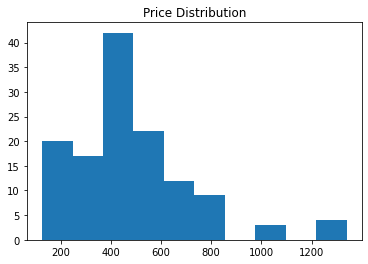

In [296]:
plt.hist(x='price', data=data)
plt.title("Price Distribution")
plt.show()

#### Diameter

In [297]:
data['diameter'].value_counts()

12.0    49
14.0    24
8.5     22
17.0    10
18.5     6
16.0     5
8.0      4
16.5     4
22.0     3
20.0     1
18.0     1
Name: diameter, dtype: int64

In [298]:
import seaborn as sns

<AxesSubplot: xlabel='diameter', ylabel='count'>

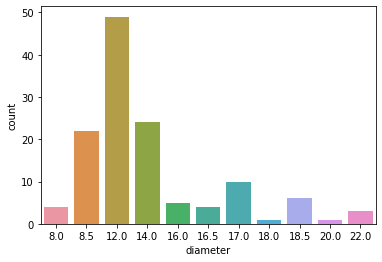

In [299]:
sns.countplot(x=data['diameter'])

#### Topping

In [300]:
data['topping'].value_counts()

chicken         29
mushrooms       22
mozzarella      21
smoked_beef     19
tuna             9
vegetables       9
meat             8
black_papper     3
sausage          3
beef             3
papperoni        2
onion            1
Name: topping, dtype: int64

<AxesSubplot: xlabel='count', ylabel='topping'>

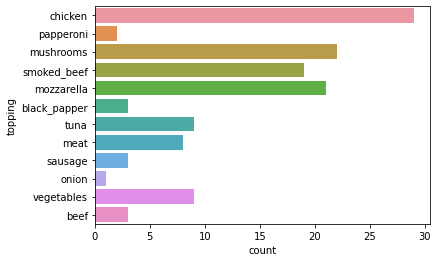

In [301]:
sns.countplot(y=data['topping'])

#### variant

In [302]:
data['variant'].value_counts()

classic              30
meat_lovers          10
double_mix           10
crunchy              10
new_york             10
double_decker         9
double_signature      5
american_favorite     5
BBQ_meat_fiesta       5
super_supreme         5
spicy_tuna            3
BBQ_sausage           3
extravaganza          3
meat_eater            3
gournet_greek         3
italian_veggie        3
thai_veggie           3
american_classic      3
neptune_tuna          3
spicy tuna            3
Name: variant, dtype: int64

<AxesSubplot: xlabel='count', ylabel='variant'>

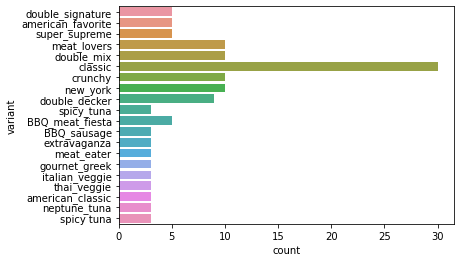

In [303]:
sns.countplot(y=data['variant'])

#### size

In [304]:
data['size'].value_counts()

medium     41
small      22
large      21
reguler    20
jumbo      15
XL         10
Name: size, dtype: int64

<AxesSubplot: xlabel='size', ylabel='count'>

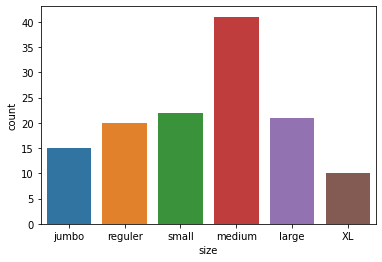

In [305]:
sns.countplot(x=data['size'])

#### Extra Sauce

<AxesSubplot: xlabel='extra_sauce', ylabel='count'>

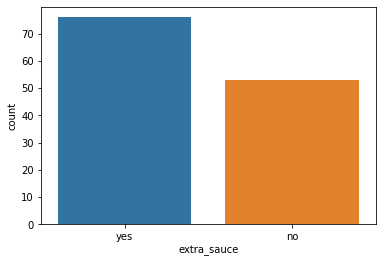

In [306]:
sns.countplot(x=data['extra_sauce'])

#### Extra Cheese

<AxesSubplot: xlabel='extra_cheese', ylabel='count'>

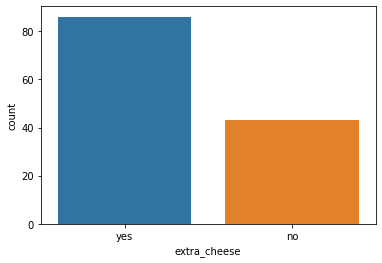

In [307]:
sns.countplot(x=data['extra_cheese'])

#### Extra Mushrooms

<AxesSubplot: xlabel='extra_mushrooms', ylabel='count'>

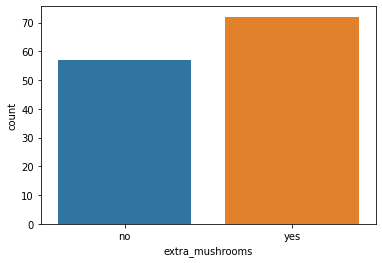

In [308]:
sns.countplot(x=data['extra_mushrooms'])

### Bivariate Analysis

#### Price by company

In [309]:
data.columns

Index(['company', 'price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms'],
      dtype='object')

<AxesSubplot: xlabel='company', ylabel='price'>

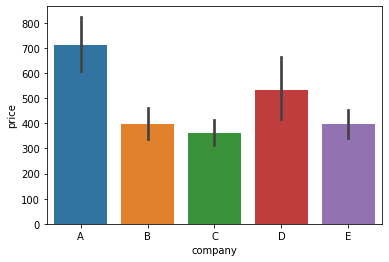

In [310]:
sns.barplot(x=data['company'], y=data['price'])

#### price by topping

<AxesSubplot: xlabel='price', ylabel='topping'>

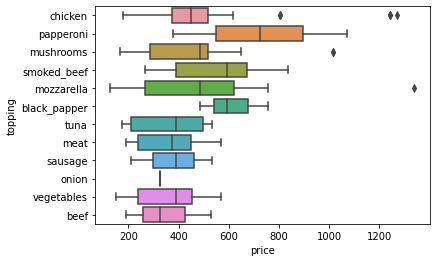

In [311]:
sns.boxplot(x='price', y='topping', data=data)

#### price by size

<AxesSubplot: xlabel='size', ylabel='price'>

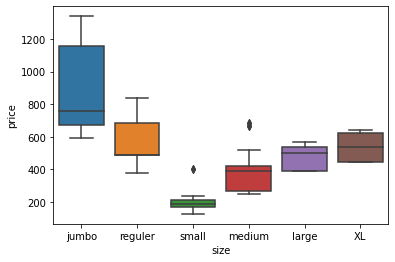

In [312]:
sns.boxplot(x='size', y='price', data=data)

#### find most expensive pizza

In [313]:
data[data['price'].max()==data['price']]

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
4,A,1339.2,18.0,mozzarella,double_signature,jumbo,yes,no,yes


#### find diameter of jumbo size pizza

In [314]:
data[data['size'] == 'jumbo']['diameter'].head()

0    22.0
1    20.0
4    18.0
5    18.5
6    16.0
Name: diameter, dtype: float64

#### find diameter of XL size pizza

In [315]:
data[data['size'] == 'XL']['diameter'].head()

29    17.0
35    17.0
41    17.0
47    17.0
93    17.0
Name: diameter, dtype: float64

#### Remove outliers

In [316]:
data[(data['size']=='jumbo') & (data['diameter']<=16)]

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
6,A,594.0,16.0,smoked_beef,american_favorite,jumbo,no,yes,yes
11,A,594.0,16.0,black_papper,super_supreme,jumbo,yes,yes,no
16,A,594.0,16.0,smoked_beef,meat_lovers,jumbo,no,yes,yes
80,D,594.0,16.0,smoked_beef,meat_lovers,jumbo,no,yes,no


In [317]:
data = data.drop(data.index[[6, 11, 16, 80]])

In [318]:
data[(data['size']=='jumbo') & (data['diameter']<=16)]

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms


#### 9. Label Encoding

In [319]:
data.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,1269.0,22.0,chicken,double_signature,jumbo,yes,yes,no
1,A,1069.2,20.0,papperoni,double_signature,jumbo,yes,yes,no
2,A,648.0,16.0,mushrooms,double_signature,reguler,yes,yes,yes
3,A,837.0,14.0,smoked_beef,double_signature,reguler,yes,no,yes
4,A,1339.2,18.0,mozzarella,double_signature,jumbo,yes,no,yes


In [320]:
cat_cols = data.select_dtypes(include=['object']).columns
cat_cols

Index(['company', 'topping', 'variant', 'size', 'extra_sauce', 'extra_cheese',
       'extra_mushrooms'],
      dtype='object')

In [321]:
from sklearn.preprocessing import LabelEncoder

In [322]:
en = LabelEncoder()
for i in cat_cols:
    data[i] = en.fit_transform(data[i])

In [323]:
data.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,0,1269.0,22.0,2,8,1,1,1,0
1,0,1069.2,20.0,7,8,1,1,1,0
2,0,648.0,16.0,5,8,4,1,1,1
3,0,837.0,14.0,9,8,4,1,0,1
4,0,1339.2,18.0,4,8,1,1,0,1


#### 10. Store feature matrix in X and response(Target) in vector y

In [324]:
X = data.drop('price', axis=1)
y = data['price']

#### 11. splitting dataset into training and testing set

In [325]:
from sklearn.model_selection import train_test_split

In [326]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#### 12. import models

In [327]:
data.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,0,1269.0,22.0,2,8,1,1,1,0
1,0,1069.2,20.0,7,8,1,1,1,0
2,0,648.0,16.0,5,8,4,1,1,1
3,0,837.0,14.0,9,8,4,1,0,1
4,0,1339.2,18.0,4,8,1,1,0,1


In [328]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

#### 13. model training

In [329]:
lr = LinearRegression()
lr.fit(X_train, y_train)

svm = SVR()
svm.fit(X_train, y_train)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

xg = XGBRegressor()
xg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

#### 14. prediction on test data

In [330]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gbr.predict(X_test)
y_pred5 = xg.predict(X_test)

#### 15. evaluating algorithm

In [331]:
from sklearn import metrics

In [332]:
score1 = metrics.r2_score(y_test, y_pred1)
score2 = metrics.r2_score(y_test, y_pred2)
score3 = metrics.r2_score(y_test, y_pred3)
score4 = metrics.r2_score(y_test, y_pred4)
score5 = metrics.r2_score(y_test, y_pred5)

print(score1, score2, score3, score4, score5)

0.6712827779795159 -0.058422678416528706 0.8249643482353486 0.8899190217855389 0.9037532335665138


In [333]:
final_data = pd.DataFrame({'Models':['LR','SVR','RF','GB','XGR'],'R2_SCORE':[score1, score2, score3, score4, score5]})
final_data

,Models,R2_SCORE
0,LR,0.671283
1,SVR,-0.058423
2,RF,0.824964
3,GB,0.889919
4,XGR,0.903753


<AxesSubplot: xlabel='Models', ylabel='R2_SCORE'>

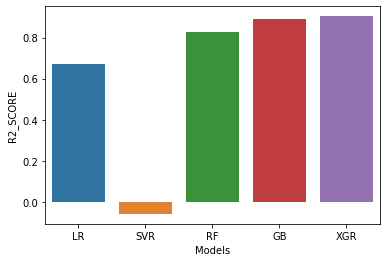

In [334]:
sns.barplot(x=final_data['Models'], y=final_data['R2_SCORE'])

#### 16. Feature Importance

- 16.1 Random Forest

In [335]:
rf.feature_importances_

array([0.03443318, 0.59857393, 0.03624692, 0.11751328, 0.17373693,
       0.02006701, 0.01409701, 0.00533174])

In [336]:
fea = pd.Series(rf.feature_importances_, index=X_train.columns)
fea

company            0.034433
diameter           0.598574
topping            0.036247
variant            0.117513
size               0.173737
extra_sauce        0.020067
extra_cheese       0.014097
extra_mushrooms    0.005332
dtype: float64

<AxesSubplot: >

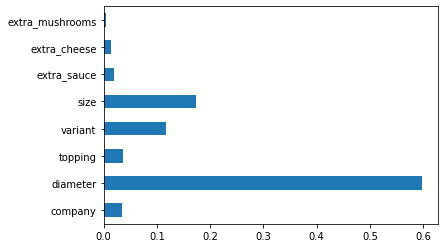

In [337]:
fea.plot(kind="barh")

- 16.2 Gradient Boosting Regressor

In [338]:
gbr.feature_importances_

array([0.00628595, 0.63676571, 0.05319937, 0.10146314, 0.16297821,
       0.03394489, 0.00247853, 0.00288419])

In [339]:
fea = pd.Series(gbr.feature_importances_, index=X_train.columns)
fea

company            0.006286
diameter           0.636766
topping            0.053199
variant            0.101463
size               0.162978
extra_sauce        0.033945
extra_cheese       0.002479
extra_mushrooms    0.002884
dtype: float64

<AxesSubplot: >

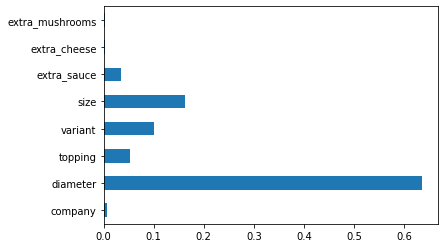

In [340]:
fea.plot(kind='barh')

- 16.3 XGBRegressor

In [341]:
xg.feature_importances_

array([0.003974  , 0.43592376, 0.02142869, 0.03392151, 0.3578377 ,
       0.12908663, 0.01259   , 0.00523772], dtype=float32)

In [342]:
fea = pd.Series(xg.feature_importances_, index=X_train.columns)
fea

company            0.003974
diameter           0.435924
topping            0.021429
variant            0.033922
size               0.357838
extra_sauce        0.129087
extra_cheese       0.012590
extra_mushrooms    0.005238
dtype: float32

<AxesSubplot: >

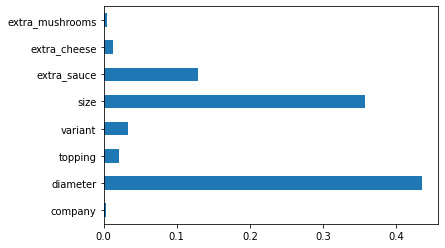

In [343]:
fea.plot(kind='barh')

#### 17. Save model

In [344]:
X = data.drop('price', axis=1)
y = data['price']

In [345]:
xgb = XGBRegressor()
xgb.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [346]:
import joblib

In [347]:
joblib.dump(xgb, 'pizza_price_prediction')

['pizza_price_prediction']

In [348]:
model = joblib.load('pizza_price_prediction')

In [349]:
df = pd.DataFrame({
    'company':1,
    'diameter':22.0,
    'topping':2,
    'variant':8,
    'size':1,
    'extra_sauce':1,
    'extra_cheese':1,
    'extra_mushrooms':1
},index=[0])

In [350]:
df

,company,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,1,22.0,2,8,1,1,1,1


In [351]:
model.predict(df)

array([1214.995], dtype=float32)